<a href="https://colab.research.google.com/github/nischalp114/MSCS_634_Lab_6/blob/main/BookCrossing_Association_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Mining with Apriori and FP-Growth  
**Name:** Nischal Pokharel  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Lab Assignment:** Association Rule Mining Lab using Book-Crossing Dataset


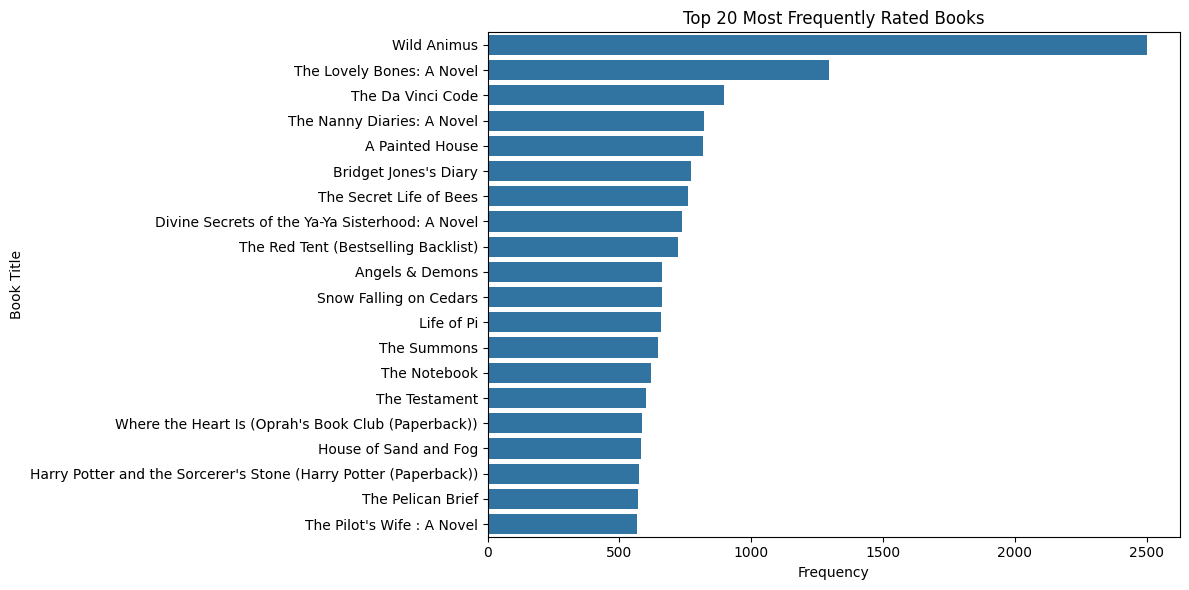

/tmp/ipython-input-1-2616367045.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


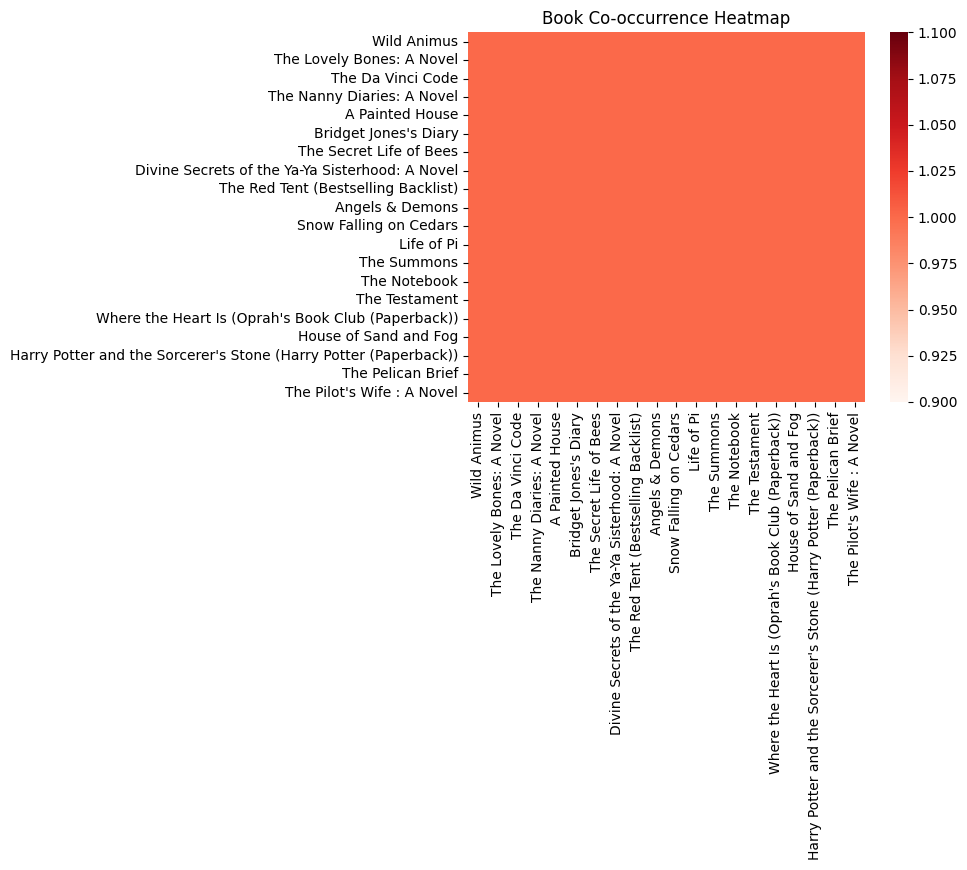

In [1]:
# Step 1: Data Preparation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset (adjust path if needed)
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', on_bad_lines='skip')
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1', on_bad_lines='skip')

# Merge and prepare transactional data
merged = ratings.merge(books, on='ISBN')
merged = merged[['User-ID', 'Book-Title']]
merged = merged[merged['Book-Title'].notnull()]

# Convert to list of transactions
transactions = merged.groupby('User-ID')['Book-Title'].apply(list).tolist()

# Convert to transaction format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Top 20 most frequent items
item_counts = df.sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title("Top 20 Most Frequently Rated Books")
plt.xlabel("Frequency")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

# Co-occurrence heatmap
top_items = item_counts.index.tolist()
co_occur = df[top_items].T.dot(df[top_items])
sns.heatmap(co_occur, cmap='Reds', annot=False)
plt.title("Book Co-occurrence Heatmap")
plt.tight_layout()
plt.show()


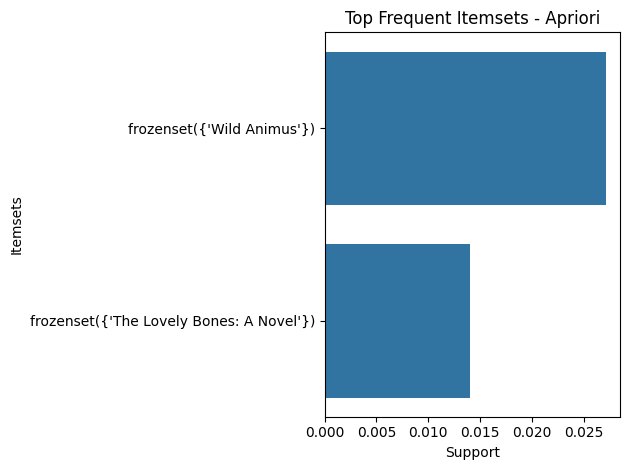

In [2]:
# Step 2: Frequent Itemset Mining Using Apriori
frequent_apriori = apriori(df, min_support=0.01, use_colnames=True)
frequent_apriori.sort_values("support", ascending=False, inplace=True)

# Top N itemsets
top_apriori = frequent_apriori.head(10)
sns.barplot(x="support", y=top_apriori['itemsets'].astype(str), data=top_apriori)
plt.title("Top Frequent Itemsets - Apriori")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()


In [ ]:
# Step 3: Frequent Itemset Mining Using FP-Growth
frequent_fp = fpgrowth(df, min_support=0.01, use_colnames=True)
frequent_fp.sort_values("support", ascending=False, inplace=True)

# Top N itemsets
top_fp = frequent_fp.head(10)
sns.barplot(x="support", y=top_fp['itemsets'].astype(str), data=top_fp)
plt.title("Top Frequent Itemsets - FP-Growth")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()


In [ ]:
# Step 4: Association Rules
rules_apriori = association_rules(frequent_apriori, metric="confidence", min_threshold=0.3)
rules_fp = association_rules(frequent_fp, metric="confidence", min_threshold=0.3)

# Scatterplot of confidence vs lift
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules_fp, x="confidence", y="lift", alpha=0.7)
plt.title("Association Rules (FP-Growth) - Confidence vs Lift")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.tight_layout()
plt.show()

# Display top 5 rules from FP-Growth
rules_fp.sort_values("lift", ascending=False).head()


### Step 5: Comparative Analysis

- **Apriori** was easier to understand but slower due to candidate generation.
- **FP-Growth** was significantly faster and more scalable on this dataset.
- Rules from both algorithms showed strong lift values, indicating strong associations.
- Challenges included memory usage and filtering meaningful frequent itemsets.
